In [1]:
import requests as rq
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [3]:
from nba_api.stats.static import players
from nba_api.stats.static import teams

from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import drafthistory
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import playercompare

from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.library.parameters import Season, SeasonTypeAllStar, LeagueIDNullable, SeasonAll

In [4]:
t = players.find_players_by_full_name('')
t

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

In [5]:
all_players = pd.DataFrame(t)

In [6]:
from nba_api.stats.static import players
player_dict = players.get_players()
player_dict

all_players_ID = [player for player in player_dict if player['id'] > 0]
all_players_ID = pd.DataFrame(player_dict)

all_players_ID

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False
...,...,...,...,...,...
4496,1627790,Ante Zizic,Ante,Zizic,True
4497,78647,Jim Zoet,Jim,Zoet,False
4498,78648,Bill Zopf,Bill,Zopf,False
4499,1627826,Ivica Zubac,Ivica,Zubac,True


In [7]:
# Find teams by full name.
teams.find_teams_by_full_name('chicago')

# # Find teams by state.
teams.find_teams_by_state('ohio')

# # Find teams by city.
teams.find_teams_by_city('chicago')

# # Find teams by team nickname.
# teams.find_teams_by_nickname('cav')

# # Find teams by year founded.
# teams.find_teams_by_year_founded(1968)

# # Find teams by abbreviation.
# teams.find_team_by_abbreviation('cle')

# # Find teams by id.
# teams.find_team_name_by_id(1610612739)

# # Get all teams.
#teams.get_teams()

[{'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [8]:
players.find_players_by_full_name('Lebron James')

[{'id': 2544,
  'full_name': 'LeBron James',
  'first_name': 'LeBron',
  'last_name': 'James',
  'is_active': True}]

In [9]:
teams.find_teams_by_full_name('Cleveland')

[{'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

# Practice

In [10]:
Duncan_Robinson_career = playercareerstats.PlayerCareerStats(player_id='1629130')
Duncan_Robinson_career_stats_df = Duncan_Robinson_career.get_data_frames()[0]
Duncan_Robinson_career_stats_df.index = Duncan_Robinson_career_stats_df.index + 1
Duncan_Robinson_career_stats_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
1,1629130,2018-19,00,1610612748,MIA,25.0,15,1,161.0,18,...,0.667,2,17,19,5,5,0,4,11,50
2,1629130,2019-20,00,1610612748,MIA,25.0,65,60,1949.0,286,...,0.906,9,203,212,91,35,15,60,179,863


# Practice: Divide by columns using value of another column in pandas df
df = pd.DataFrame(np.random.rand(5,3), columns=list('ABC')) <br>
df <br><br>
df[['B','C']].div(df.A, axis=0) <br><br>
.546552/.065475

In [11]:
#using Iloc
averages = round(Duncan_Robinson_career_stats_df.iloc[:,20:].div(Duncan_Robinson_career_stats_df['GP'],axis=0),2)
averages

# #using loc
# averages = round(Duncan_Robinson_career_stats_df.loc[:,('REB','AST','STL','BLK', 'TOV', 'PF','PTS')].div(Duncan_Robinson_career_stats_df['GP'],axis=0),2)
# averages

,REB,AST,STL,BLK,TOV,PF,PTS
1,1.27,0.33,0.33,0.00,0.27,0.73,3.33
2,3.26,1.40,0.54,0.23,0.92,2.75,13.28


# Clutch Time Shots

In [12]:
players.find_players_by_full_name('Nunn')

[{'id': 1629134,
  'full_name': 'Kendrick Nunn',
  'first_name': 'Kendrick',
  'last_name': 'Nunn',
  'is_active': True},
 {'id': 203263,
  'full_name': 'James Nunnally',
  'first_name': 'James',
  'last_name': 'Nunnally',
  'is_active': False}]

In [13]:
teams.find_teams_by_full_name('Lakers')

[{'id': 1610612747,
  'full_name': 'Los Angeles Lakers',
  'abbreviation': 'LAL',
  'nickname': 'Lakers',
  'city': 'Los Angeles',
  'state': 'California',
  'year_founded': 1948}]

In [14]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

#     # Center Court
#     center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
#                            linewidth=lw, color=color)
#     center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
#                            linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 400, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

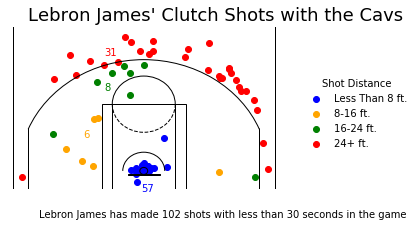

In [15]:
#Team 1 = Cavs, Team 2 = Heat, Team 3 = Lakers 
Lebron_James_career_Cavs = shotchartdetail.ShotChartDetail(team_id='1610612739',player_id='2544')
Lebron_James_career_Cavs_df = Lebron_James_career_Cavs.get_data_frames()[0]
Lebron_James_career_Cavs_df.index = Lebron_James_career_Cavs_df.index + 1
Lebron_James_career_Cavs_df

Lebron_James_career_Cavs_df_clutch_time = Lebron_James_career_Cavs_df.loc[(Lebron_James_career_Cavs_df['PERIOD'] == 4) & 
                                                                (Lebron_James_career_Cavs_df['MINUTES_REMAINING'] < 1) &
                                                                (Lebron_James_career_Cavs_df['SECONDS_REMAINING'] < 30), :]
Lebron_James_career_Cavs_df_clutch_time.head()

Cavs_clutch_shots_made = Lebron_James_career_Cavs_df_clutch_time.loc[:,'SHOT_ZONE_RANGE'].value_counts()
Cavs_clutch_shots_made.to_frame()

# print(Cavs_clutch_shots_made.iloc[0])
# print(Cavs_clutch_shots_made.iloc[3])
# print(Cavs_clutch_shots_made.iloc[2])
# print(Cavs_clutch_shots_made.iloc[1])

#Set up colors and labels
Distance = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.']
Colors = ['Blue', 'Orange', 'Green', 'Red']

#Plot the graph
Team_1 = sns.FacetGrid(data=Lebron_James_career_Cavs_df_clutch_time, hue='SHOT_ZONE_RANGE', hue_order=Distance, palette =  Colors, aspect=1.61)
Team_1.map(plt.scatter, 'LOC_X', 'LOC_Y').add_legend(title = 'Shot Distance')
draw_court(outer_lines=True)

#Add Text FGM Labels to scatterplot
plt.text(-5,-45, Cavs_clutch_shots_made.iloc[0],color = 'blue')
plt.text(-115,70, Cavs_clutch_shots_made.iloc[3],color = 'orange')
plt.text(-75,170, Cavs_clutch_shots_made.iloc[2],color = 'green')
plt.text(-75,245, Cavs_clutch_shots_made.iloc[1],color = 'red')

#Cleanup graph/ add necessary info
plt.style.use('fivethirtyeight')
plt.axis('off')
plt.text(-220,320,"Lebron James' Clutch Shots with the Cavs",size = 18)
plt.text(-200,-100,f"Lebron James has made {Cavs_clutch_shots_made.iloc[0] + Cavs_clutch_shots_made.iloc[1] + Cavs_clutch_shots_made.iloc[2] + Cavs_clutch_shots_made.iloc[3]} shots with less than 30 seconds in the game ",size = 10)
plt.show()

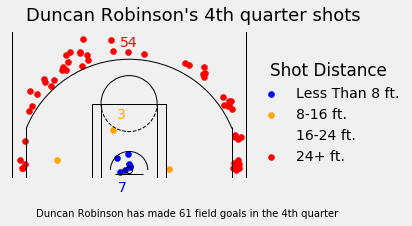

In [16]:
### Team 1 = Heat, Team 2 = Heat, Team 3 = Lakers 
Duncan_Robinson_career_Heat = shotchartdetail.ShotChartDetail(team_id='1610612748',player_id='1629130')
Duncan_Robinson_career_Heat_df = Duncan_Robinson_career_Heat.get_data_frames()[0]
Duncan_Robinson_career_Heat_df.index = Duncan_Robinson_career_Heat_df.index + 1
Duncan_Robinson_career_Heat_df

Duncan_Robinson_career_Heat_df_clutch_time = Duncan_Robinson_career_Heat_df.loc[(Duncan_Robinson_career_Heat_df['PERIOD'] == 4) & 
                                                                (Duncan_Robinson_career_Heat_df['MINUTES_REMAINING'] < 12) &
                                                                (Duncan_Robinson_career_Heat_df['SECONDS_REMAINING'] < 70), :]
Duncan_Robinson_career_Heat_df_clutch_time.head()

Heat_clutch_shots_made = Duncan_Robinson_career_Heat_df_clutch_time.loc[:,'SHOT_ZONE_RANGE'].value_counts()
Heat_clutch_shots_made.to_frame()

# print(Heat_clutch_shots_made.iloc[1])
# print(Heat_clutch_shots_made.iloc[2])
# print(Heat_clutch_shots_made.iloc[2])
# print(Heat_clutch_shots_made.iloc[0])

#Set up colors and labels
Distance = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.']
Colors = ['Blue', 'Orange', 'Green', 'Red']

#Plot the graph
Team_2 = sns.FacetGrid(data=Duncan_Robinson_career_Heat_df_clutch_time, hue='SHOT_ZONE_RANGE', hue_order=Distance, palette =  Colors, aspect=1.61)
Team_2.map(plt.scatter, 'LOC_X', 'LOC_Y').add_legend(title = 'Shot Distance')
draw_court(outer_lines=True)

#Add Text FGM Labels to scatterplot
plt.text(-25,-45, Heat_clutch_shots_made.iloc[1],color = 'blue')
#plt.text(-25,170, Heat_clutch_shots_made.iloc[3],color = 'green')
plt.text(-25,110, Heat_clutch_shots_made.iloc[2],color = 'orange')
plt.text(-20,265, Heat_clutch_shots_made.iloc[0],color = 'red')

#Cleanup graph/ add necessary info
plt.style.use('fivethirtyeight')
plt.axis('off')
plt.text(-220,320,"Duncan Robinson's 4th quarter shots",size = 18)
plt.text(-200,-100,f"Duncan Robinson has made {Heat_clutch_shots_made.iloc[0] + Heat_clutch_shots_made.iloc[1]} field goals in the 4th quarter",size = 10)
plt.show()

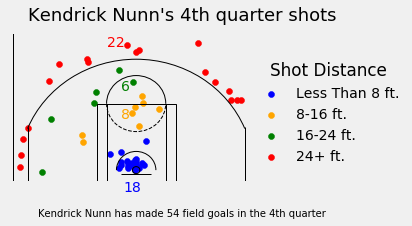

In [17]:
### Team 1 = Heat, Team 2 = Heat, Team 3 = Lakers 
Kendrick_Nunn_career_Heat = shotchartdetail.ShotChartDetail(team_id='1610612748',player_id='1629134')
Kendrick_Nunn_career_Heat_df = Kendrick_Nunn_career_Heat.get_data_frames()[0]
Kendrick_Nunn_career_Heat_df.index = Kendrick_Nunn_career_Heat_df.index + 1
Kendrick_Nunn_career_Heat_df

Kendrick_Nunn_career_Heat_df_clutch_time = Kendrick_Nunn_career_Heat_df.loc[(Kendrick_Nunn_career_Heat_df['PERIOD'] == 4) & 
                                                                (Kendrick_Nunn_career_Heat_df['MINUTES_REMAINING'] < 12) &
                                                                (Kendrick_Nunn_career_Heat_df['SECONDS_REMAINING'] < 70), :]
Kendrick_Nunn_career_Heat_df_clutch_time.head()

Heat_clutch_shots_made = Kendrick_Nunn_career_Heat_df_clutch_time.loc[:,'SHOT_ZONE_RANGE'].value_counts()
Heat_clutch_shots_made.to_frame()

# print(Heat_clutch_shots_made.iloc[1])
# print(Heat_clutch_shots_made.iloc[2])
# print(Heat_clutch_shots_made.iloc[3])
# print(Heat_clutch_shots_made.iloc[0])

#Set up colors and labels
Distance = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.']
Colors = ['Blue', 'Orange', 'Green', 'Red']

#Plot the graph
Team_2 = sns.FacetGrid(data=Kendrick_Nunn_career_Heat_df_clutch_time, hue='SHOT_ZONE_RANGE', hue_order=Distance, palette =  Colors, aspect=1.61)
Team_2.map(plt.scatter, 'LOC_X', 'LOC_Y').add_legend(title = 'Shot Distance')
draw_court(outer_lines=True)

#Add Text FGM Labels to scatterplot
plt.text(-25,-45, Heat_clutch_shots_made.iloc[1],color = 'blue')
plt.text(-30,110, Heat_clutch_shots_made.iloc[2],color = 'orange')
plt.text(-30,170, Heat_clutch_shots_made.iloc[3],color = 'green')
plt.text(-60,265, Heat_clutch_shots_made.iloc[0],color = 'red')

#Cleanup graph/ add necessary info
plt.style.use('fivethirtyeight')
plt.axis('off')
plt.text(-220,320,"Kendrick Nunn's 4th quarter shots",size = 18)
plt.text(-200,-100,f"Kendrick Nunn has made {Heat_clutch_shots_made.iloc[0] + Heat_clutch_shots_made.iloc[1] + Heat_clutch_shots_made.iloc[2] + Heat_clutch_shots_made.iloc[3]} field goals in the 4th quarter ",size = 10)
plt.show()

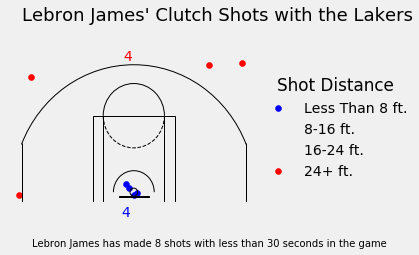

In [18]:
### Team 1 = Lakers, Team 2 = Lakers, Team 3 = Lakers 
Lebron_James_career_Lakers = shotchartdetail.ShotChartDetail(team_id='1610612747',player_id='2544')
Lebron_James_career_Lakers_df = Lebron_James_career_Lakers.get_data_frames()[0]
Lebron_James_career_Lakers_df.index = Lebron_James_career_Lakers_df.index + 1
Lebron_James_career_Lakers_df

Lebron_James_career_Lakers_df_clutch_time = Lebron_James_career_Lakers_df.loc[(Lebron_James_career_Lakers_df['PERIOD'] == 4) & 
                                                                (Lebron_James_career_Lakers_df['MINUTES_REMAINING'] < 1) &
                                                                (Lebron_James_career_Lakers_df['SECONDS_REMAINING'] < 30), :]
Lebron_James_career_Lakers_df_clutch_time.head()

Lakers_clutch_shots_made = Lebron_James_career_Lakers_df_clutch_time.loc[:,'SHOT_ZONE_RANGE'].value_counts()
Lakers_clutch_shots_made.to_frame()

# print(Lakers_clutch_shots_made.iloc[0])
# print(Lakers_clutch_shots_made.iloc[3])
# print(Lakers_clutch_shots_made.iloc[2])
# print(Lakers_clutch_shots_made.iloc[1])

#Set up colors and labels
Distance = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.']
Colors = ['Blue', 'Orange', 'Green', 'Red']

#Plot the graph
Team_3 = sns.FacetGrid(data=Lebron_James_career_Lakers_df_clutch_time, hue='SHOT_ZONE_RANGE', hue_order=Distance, palette =  Colors, aspect=1.61)
Team_3.map(plt.scatter, 'LOC_X', 'LOC_Y').add_legend(title = 'Shot Distance')
draw_court(outer_lines=True)

#Add Text FGM Labels to scatterplot
plt.text(-25,-45, Lakers_clutch_shots_made.iloc[0],color = 'blue')
#plt.text(-25,110, Lakers_clutch_shots_made.iloc[3],color = 'orange')
#plt.text(-25,170, Lakers_clutch_shots_made.iloc[2],color = 'green')
plt.text(-20,245, Lakers_clutch_shots_made.iloc[1],color = 'red')

#Cleanup graph/ add necessary info
plt.style.use('fivethirtyeight')
plt.axis('off')
plt.text(-220,320,"Lebron James' Clutch Shots with the Lakers",size = 18)
plt.text(-200,-100,f"Lebron James has made {Lakers_clutch_shots_made.iloc[0] + Lakers_clutch_shots_made.iloc[1]} shots with less than 30 seconds in the game ",size = 10)
plt.show()

# Bulls Draft History

In [26]:
draft_history = drafthistory.DraftHistory(league_id = '00')
draft_history_df = draft_history.get_data_frames()[0]
draft_history_df.head(60)

bulls_draft_history_df = draft_history_df.loc[(draft_history_df['TEAM_NAME'] == 'Bulls') & 
                                              (draft_history_df['SEASON']    >= '2015' ), :]
bulls_draft_history_df

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE
6,1629632,Coby White,2019,1,7,7,Draft,1610612741,Chicago,Bulls,CHI,North Carolina,College/University
37,1629655,Daniel Gafford,2019,2,8,38,Draft,1610612741,Chicago,Bulls,CHI,Arkansas,College/University
66,1628976,Wendell Carter Jr.,2018,1,7,7,Draft,1610612741,Chicago,Bulls,CHI,West Virginia,College/University
81,1628990,Chandler Hutchison,2018,1,22,22,Draft,1610612741,Chicago,Bulls,CHI,Boise State,College/University
135,1628383,Justin Patton,2017,1,16,16,Draft,1610612741,Chicago,Bulls,CHI,Creighton,College/University
157,1628395,Jordan Bell,2017,2,8,38,Draft,1610612741,Chicago,Bulls,CHI,Oregon,College/University
193,1627756,Denzel Valentine,2016,1,14,14,Draft,1610612741,Chicago,Bulls,CHI,Michigan State,College/University
227,1627835,Paul Zipser,2016,2,18,48,Draft,1610612741,Chicago,Bulls,CHI,FC Bayern Muenchen,Other Team/Club
261,1626171,Bobby Portis,2015,1,22,22,Draft,1610612741,Chicago,Bulls,CHI,Arkansas,College/University


# Game Log Information

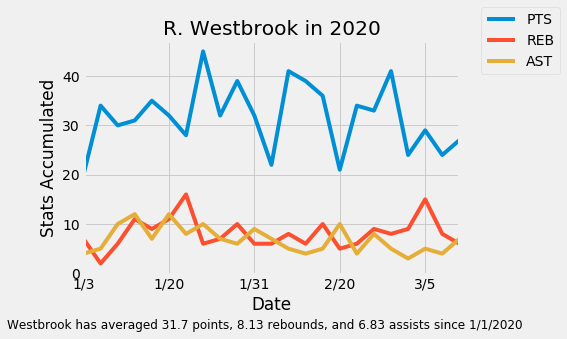

In [20]:
#ttps://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/playergamelog.md

#print the data frame 
gamelog_Westbrook = playergamelog.PlayerGameLog(player_id='201566', season = '2019')
df_Westbrook_games_2019 = gamelog_Westbrook.get_data_frames()[0]

#set index to have index as correct game numbers
df_Westbrook_games_2019 = df_Westbrook_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Westbrook_games_2019.index = df_Westbrook_games_2019.index + 1
df_Westbrook_games_2019 = df_Westbrook_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Westbrook_games_2019['Game_ID'] = df_Westbrook_games_2019['Game_ID'].astype(int)
df_Westbrook_games_2019.tail()

#get data type
df_Westbrook_games_2019.dtypes.head()

#Take games since 1/1/2020
gamelog_since_January_Westbrook = df_Westbrook_games_2019.loc[(df_Westbrook_games_2019['Game_ID'] >= 21900504),:]
gamelog_since_January_Westbrook = gamelog_since_January_Westbrook.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_since_January_Westbrook['GAME_DATE'] = pd.to_datetime(gamelog_since_January_Westbrook['GAME_DATE'])
gamelog_since_January_Westbrook['month_year'] = gamelog_since_January_Westbrook['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_since_January_Westbrook


Westbrook_PTS_since_Jan2020 = round(gamelog_since_January_Westbrook['PTS'].mean(),2)
Westbrook_REB_since_Jan2020 = round(gamelog_since_January_Westbrook['REB'].mean(),2)
Westbrook_AST_since_Jan2020 = round(gamelog_since_January_Westbrook['AST'].mean(),2)

chart1 = gamelog_since_January_Westbrook.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart1.set_title("R. Westbrook in 2020")
chart1.set_xlabel('Date')
chart1.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Westbrook has averaged {Westbrook_PTS_since_Jan2020} points, {Westbrook_REB_since_Jan2020} rebounds, and {Westbrook_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

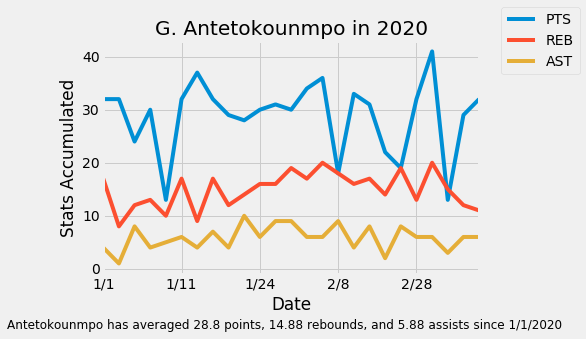

In [21]:
#print the data frame 
gamelog_Antetokounmpo = playergamelog.PlayerGameLog(player_id='203507', season = '2019')
df_Antetokounmpo_games_2019 = gamelog_Antetokounmpo.get_data_frames()[0]

#set index to have index as correct game numbers
df_Antetokounmpo_games_2019 = df_Antetokounmpo_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Antetokounmpo_games_2019.index = df_Antetokounmpo_games_2019.index + 1
df_Antetokounmpo_games_2019 = df_Antetokounmpo_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Antetokounmpo_games_2019['Game_ID'] = df_Antetokounmpo_games_2019['Game_ID'].astype(int)
df_Antetokounmpo_games_2019.tail()

#get data type
df_Antetokounmpo_games_2019.dtypes.head()

#Take games since 1/1/2020
gamelog_since_January_Antetokounmpo = df_Antetokounmpo_games_2019.loc[(df_Antetokounmpo_games_2019['Game_ID'] >= 21900504),:]
gamelog_since_January_Antetokounmpo = gamelog_since_January_Antetokounmpo.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_since_January_Antetokounmpo['GAME_DATE'] = pd.to_datetime(gamelog_since_January_Antetokounmpo['GAME_DATE'])
gamelog_since_January_Antetokounmpo['month_year'] = gamelog_since_January_Antetokounmpo['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_since_January_Antetokounmpo

Giannis_PTS_since_Jan2020 = round(gamelog_since_January_Antetokounmpo['PTS'].mean(),2)
Giannis_REB_since_Jan2020 = round(gamelog_since_January_Antetokounmpo['REB'].mean(),2)
Giannis_AST_since_Jan2020 = round(gamelog_since_January_Antetokounmpo['AST'].mean(),2)

chart2 = gamelog_since_January_Antetokounmpo.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart2.set_title("G. Antetokounmpo in 2020")
chart2.set_xlabel('Date')
chart2.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Antetokounmpo has averaged {Giannis_PTS_since_Jan2020} points, {Giannis_REB_since_Jan2020} rebounds, and {Giannis_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

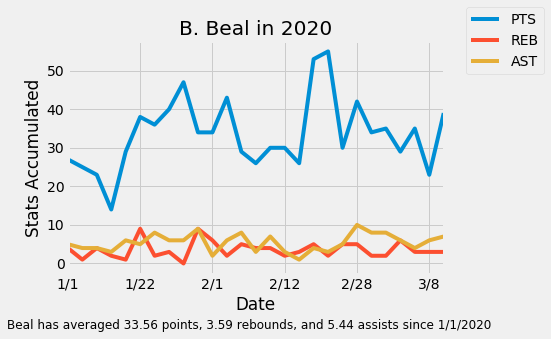

In [22]:
#print the data frame 
gamelog_Beal = playergamelog.PlayerGameLog(player_id='203078', season = '2019')
df_Beal_games_2019 = gamelog_Beal.get_data_frames()[0]

#set index to have index as correct game numbers
df_Beal_games_2019 = df_Beal_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Beal_games_2019.index = df_Beal_games_2019.index + 1
df_Beal_games_2019 = df_Beal_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Beal_games_2019['Game_ID'] = df_Beal_games_2019['Game_ID'].astype(int)
df_Beal_games_2019.tail()

#get data type
df_Beal_games_2019.dtypes.head()

#Take games since 1/1/2020
gamelog_since_January_Beal = df_Beal_games_2019.loc[(df_Beal_games_2019['Game_ID'] >= 21900504),:]
gamelog_since_January_Beal = gamelog_since_January_Beal.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_since_January_Beal['GAME_DATE'] = pd.to_datetime(gamelog_since_January_Beal['GAME_DATE'])
gamelog_since_January_Beal['month_year'] = gamelog_since_January_Beal['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_since_January_Beal

Beal_PTS_since_Jan2020 = round(gamelog_since_January_Beal['PTS'].mean(),2)
Beal_REB_since_Jan2020 = round(gamelog_since_January_Beal['REB'].mean(),2)
Beal_AST_since_Jan2020 = round(gamelog_since_January_Beal['AST'].mean(),2)

chart3 = gamelog_since_January_Beal.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart3.set_title("B. Beal in 2020")
chart3.set_xlabel('Date')
chart3.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Beal has averaged {Beal_PTS_since_Jan2020} points, {Beal_REB_since_Jan2020} rebounds, and {Beal_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

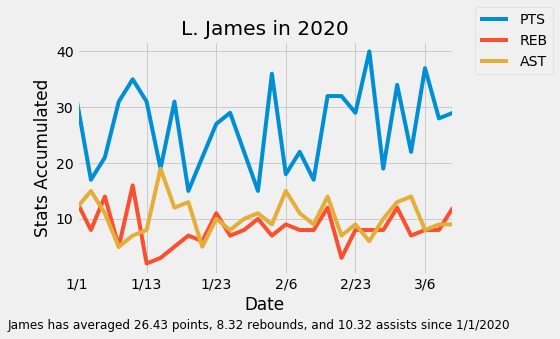

In [23]:
#print the data frame 
gamelog_James = playergamelog.PlayerGameLog(player_id='2544', season = '2019')
df_James_games_2019 = gamelog_James.get_data_frames()[0]

#set index to have index as correct game numbers
df_James_games_2019 = df_James_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_James_games_2019.index = df_James_games_2019.index + 1
df_James_games_2019 = df_James_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_James_games_2019['Game_ID'] = df_James_games_2019['Game_ID'].astype(int)
df_James_games_2019.tail()

#get data type
df_James_games_2019.dtypes.head()

#Take games since 1/1/2020
gamelog_since_January_James = df_James_games_2019.loc[(df_James_games_2019['Game_ID'] >= 21900504),:]
gamelog_since_January_James = gamelog_since_January_James.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_since_January_James['GAME_DATE'] = pd.to_datetime(gamelog_since_January_James['GAME_DATE'])
gamelog_since_January_James['month_year'] = gamelog_since_January_James['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_since_January_James

James_PTS_since_Jan2020 = round(gamelog_since_January_James['PTS'].mean(),2)
James_REB_since_Jan2020 = round(gamelog_since_January_James['REB'].mean(),2)
James_AST_since_Jan2020 = round(gamelog_since_January_James['AST'].mean(),2)

chart4 = gamelog_since_January_James.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart4.set_title("L. James in 2020")
chart4.set_xlabel('Date')
chart4.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"James has averaged {James_PTS_since_Jan2020} points, {James_REB_since_Jan2020} rebounds, and {James_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

NameError: name 'Russ_PTS_since_Jan2020' is not defined

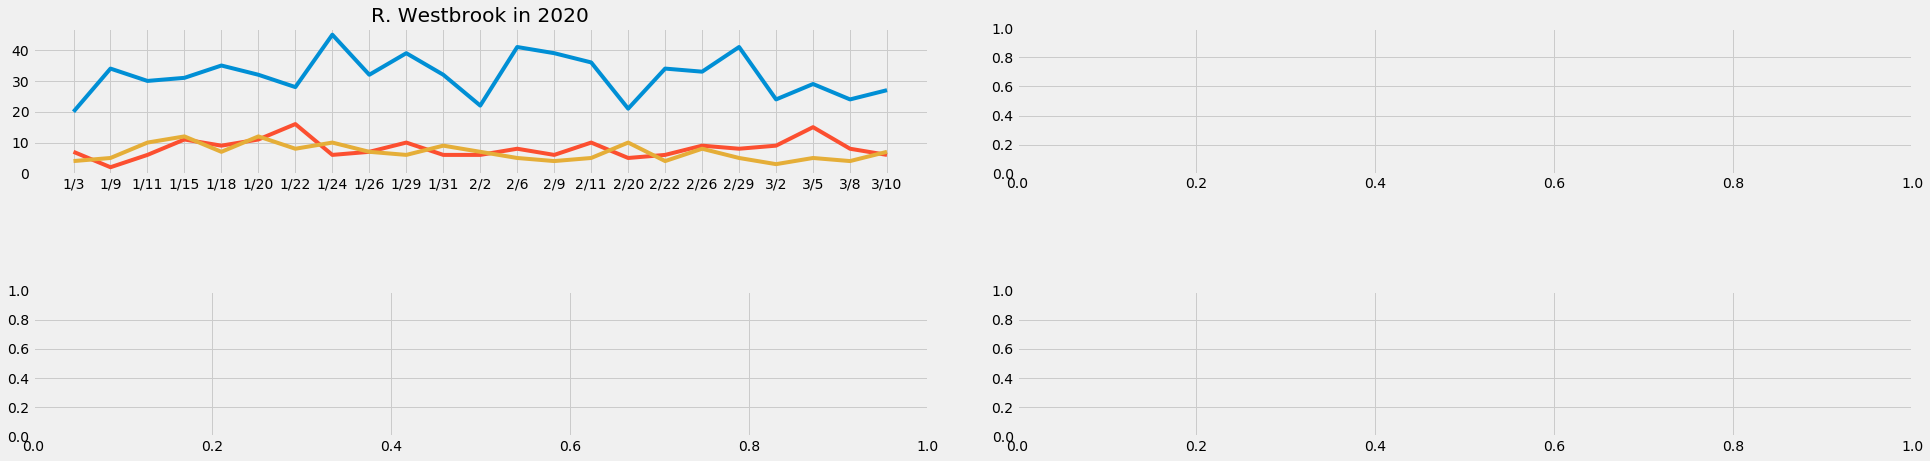

In [24]:
fig, ((chart1, chart2), (chart3, chart4)) = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(30,7)
fig.subplots_adjust(wspace = .1)
fig.subplots_adjust(hspace = .8)


l1, = chart1.plot(gamelog_since_January_Westbrook['month_year'], gamelog_since_January_Westbrook['PTS'])
l2, = chart1.plot(gamelog_since_January_Westbrook['month_year'], gamelog_since_January_Westbrook['REB'])
l3, = chart1.plot(gamelog_since_January_Westbrook['month_year'], gamelog_since_January_Westbrook['AST'])
chart1.set_title("R. Westbrook in 2020")
txt= f"Westbrook has averaged {Russ_PTS_since_Jan2020} points, {Russ_REB_since_Jan2020} rebounds, and {Russ_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.28, 0.495, txt, wrap=True, horizontalalignment='center', fontsize=10)

l1, = chart2.plot(gamelog_since_January_Antetokounmpo['month_year'], gamelog_since_January_Antetokounmpo['PTS'])
l2, = chart2.plot(gamelog_since_January_Antetokounmpo['month_year'], gamelog_since_January_Antetokounmpo['REB'])
l3, = chart2.plot(gamelog_since_January_Antetokounmpo['month_year'], gamelog_since_January_Antetokounmpo['AST'])
chart2.set_title("G. Antetokounmpo in 2020")
txt2= f"Giannis has averaged {Giannis_PTS_since_Jan2020} points, {Giannis_REB_since_Jan2020} rebounds, and {Giannis_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.74, 0.495, txt2, wrap=True, horizontalalignment='center', fontsize=10)

l1, = chart3.plot(gamelog_since_January_Beal['month_year'], gamelog_since_January_Beal['PTS'])
l2, = chart3.plot(gamelog_since_January_Beal['month_year'], gamelog_since_January_Beal['REB'])
l3, = chart3.plot(gamelog_since_January_Beal['month_year'], gamelog_since_January_Beal['AST'])
chart3.set_title("B. Beal in 2020")
#plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt3= f"Beal has averaged {Beal_PTS_since_Jan2020} points, {Beal_REB_since_Jan2020} rebounds, and {Beal_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.28, -0.04, txt3, wrap=True, horizontalalignment='center', fontsize=10)

l1, = chart4.plot(gamelog_since_January_James['month_year'], gamelog_since_January_James['PTS'])
l2, = chart4.plot(gamelog_since_January_James['month_year'], gamelog_since_January_James['REB'])
l3, = chart4.plot(gamelog_since_January_James['month_year'], gamelog_since_January_James['AST'])
chart4.set_title("L. James in 2020")
txt4= f"Lebron has averaged {James_PTS_since_Jan2020} points, {James_REB_since_Jan2020} rebounds, and {James_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.74, -0.04, txt4, wrap=True, horizontalalignment='center', fontsize=10)

fig.text(0.06, 0.5, 'Stats Accumulated', ha='center', va='center', rotation='vertical',fontsize=24)


plt.legend([l1, l2, l3],["PTS", "REB", "AST"],loc=(-.13, 1.1),prop={'size': 22})
#plt.tight_layout()

plt.savefig('Players_pts_reb_ast.png')

# Rookies before and after 1/1/2020

In [ ]:
players.find_players_by_full_name('Robinson')

In [ ]:
#print the data frame 
gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games_2019 = gamelog_Nunn.get_data_frames()[0]

#set index to have index as correct game numbers
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Nunn_games_2019.index = df_Nunn_games_2019.index + 1
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Nunn_games_2019['Game_ID'] = df_Nunn_games_2019['Game_ID'].astype(int)
df_Nunn_games_2019.tail()

#get data type
df_Nunn_games_2019.dtypes.head()

#Take games before 1/1/2020
gamelog_before_January_Nunn = df_Nunn_games_2019.loc[(df_Nunn_games_2019['Game_ID'] <= 21900504),:]
gamelog_before_January_Nunn = gamelog_before_January_Nunn.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_before_January_Nunn['GAME_DATE'] = pd.to_datetime(gamelog_before_January_Nunn['GAME_DATE'])
gamelog_before_January_Nunn['month_year'] = gamelog_before_January_Nunn['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_before_January_Nunn

Nunn_PTS_before_Jan2020 = round(gamelog_before_January_Nunn['PTS'].mean(),2)
Nunn_REB_before_Jan2020 = round(gamelog_before_January_Nunn['REB'].mean(),2)
Nunn_AST_before_Jan2020 = round(gamelog_before_January_Nunn['AST'].mean(),2)

chart5 = gamelog_before_January_Nunn.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart5.set_title("K. Nunn in 2019")
chart5.set_xlabel('Date')
chart5.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Nunn has averaged {Nunn_PTS_before_Jan2020} points, {Nunn_REB_before_Jan2020} rebounds, and {Nunn_AST_before_Jan2020} assists before 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:
#print the data frame 
gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games_2019 = gamelog_Nunn.get_data_frames()[0]

#set index to have index as correct game numbers
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Nunn_games_2019.index = df_Nunn_games_2019.index + 1
df_Nunn_games_2019 = df_Nunn_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Nunn_games_2019['Game_ID'] = df_Nunn_games_2019['Game_ID'].astype(int)
df_Nunn_games_2019.tail()

#get data type
df_Nunn_games_2019.dtypes.head()

#Take games after 1/1/2020
gamelog_after_January_Nunn = df_Nunn_games_2019.loc[(df_Nunn_games_2019['Game_ID'] >= 21900504),:]
gamelog_after_January_Nunn = gamelog_after_January_Nunn.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_after_January_Nunn['GAME_DATE'] = pd.to_datetime(gamelog_after_January_Nunn['GAME_DATE'])
gamelog_after_January_Nunn['month_year'] = gamelog_after_January_Nunn['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_after_January_Nunn

Nunn_PTS_after_Jan2020 = round(gamelog_after_January_Nunn['PTS'].mean(),2)
Nunn_REB_after_Jan2020 = round(gamelog_after_January_Nunn['REB'].mean(),2)
Nunn_AST_after_Jan2020 = round(gamelog_after_January_Nunn['AST'].mean(),2)

chart6 = gamelog_after_January_Nunn.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart6.set_title("K. Nunn in 2020")
chart6.set_xlabel('Date')
chart6.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Nunn has averaged {Nunn_PTS_after_Jan2020} points, {Nunn_REB_after_Jan2020} rebounds, and {Nunn_AST_after_Jan2020} assists after 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:
#print the data frame 
gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games_2019 = gamelog_Robinson.get_data_frames()[0]

#set index to have index as correct game numbers
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Robinson_games_2019.index = df_Robinson_games_2019.index + 1
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Robinson_games_2019['Game_ID'] = df_Robinson_games_2019['Game_ID'].astype(int)
df_Robinson_games_2019.tail()

#get data type
df_Robinson_games_2019.dtypes.head()

#Take games before 1/1/2020
gamelog_before_January_Robinson = df_Robinson_games_2019.loc[(df_Robinson_games_2019['Game_ID'] <= 21900504),:]
gamelog_before_January_Robinson = gamelog_before_January_Robinson.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_before_January_Robinson['GAME_DATE'] = pd.to_datetime(gamelog_before_January_Robinson['GAME_DATE'])
gamelog_before_January_Robinson['month_year'] = gamelog_before_January_Robinson['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_before_January_Robinson

Robinson_PTS_before_Jan2020 = round(gamelog_before_January_Robinson['PTS'].mean(),2)
Robinson_REB_before_Jan2020 = round(gamelog_before_January_Robinson['REB'].mean(),2)
Robinson_AST_before_Jan2020 = round(gamelog_before_January_Robinson['AST'].mean(),2)

chart7 = gamelog_before_January_Robinson.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart7.set_title("D. Robinson in 2019")
chart7.set_xlabel('Date')
chart7.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Robinson has averaged {Robinson_PTS_before_Jan2020} points, {Robinson_REB_before_Jan2020} rebounds, and {Robinson_AST_before_Jan2020} assists before 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:
#print the data frame 
gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games_2019 = gamelog_Robinson.get_data_frames()[0]

#set index to have index as correct game numbers
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Robinson_games_2019.index = df_Robinson_games_2019.index + 1
df_Robinson_games_2019 = df_Robinson_games_2019.sort_values(by = 'Game_ID', ascending = False)
#change game id to integer
df_Robinson_games_2019['Game_ID'] = df_Robinson_games_2019['Game_ID'].astype(int)
df_Robinson_games_2019.tail()

#get data type
df_Robinson_games_2019.dtypes.head()

#Take games after 1/1/2020
gamelog_after_January_Robinson = df_Robinson_games_2019.loc[(df_Robinson_games_2019['Game_ID'] >= 21900504),:]
gamelog_after_January_Robinson = gamelog_after_January_Robinson.iloc[::-1]
#Convert 'GAME_DATE' column to date-time, remove the year, format without leading 0's.
gamelog_after_January_Robinson['GAME_DATE'] = pd.to_datetime(gamelog_after_January_Robinson['GAME_DATE'])
gamelog_after_January_Robinson['month_year'] = gamelog_after_January_Robinson['GAME_DATE'].dt.strftime("%#m/%#d")
gamelog_after_January_Robinson

Robinson_PTS_after_Jan2020 = round(gamelog_after_January_Robinson['PTS'].mean(),2)
Robinson_REB_after_Jan2020 = round(gamelog_after_January_Robinson['REB'].mean(),2)
Robinson_AST_after_Jan2020 = round(gamelog_after_January_Robinson['AST'].mean(),2)

chart8 = gamelog_after_January_Robinson.plot(x = 'month_year', y = ['PTS','REB','AST'])
chart8.set_title("D. Robinson in 2020")
chart8.set_xlabel('Date')
chart8.set_ylabel('Stats Accumulated')
plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt= f"Robinson has averaged {Robinson_PTS_after_Jan2020} points, {Robinson_REB_after_Jan2020} rebounds, and {Robinson_AST_after_Jan2020} assists after 1/1/2020"
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:
fig, ((chart5, chart6), (chart7, chart8)) = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(30,7)
fig.subplots_adjust(wspace = .1)
fig.subplots_adjust(hspace = .8)


l1, = chart5.plot(gamelog_before_January_Nunn['month_year'], gamelog_before_January_Nunn['PTS'])
l2, = chart5.plot(gamelog_before_January_Nunn['month_year'], gamelog_before_January_Nunn['REB'])
l3, = chart5.plot(gamelog_before_January_Nunn['month_year'], gamelog_before_January_Nunn['AST'])
chart5.set_title("K. Nunn in 2019")
txt= f"Nunn averaged {Nunn_PTS_before_Jan2020} points, {Nunn_REB_before_Jan2020} rebounds, and {Nunn_AST_before_Jan2020} assists until 1/1/2020"
plt.figtext(0.28, 0.495, txt, wrap=True, horizontalalignment='center', fontsize=10)

l1, = chart6.plot(gamelog_since_January_Antetokounmpo['month_year'], gamelog_since_January_Antetokounmpo['PTS'])
l2, = chart6.plot(gamelog_since_January_Antetokounmpo['month_year'], gamelog_since_January_Antetokounmpo['REB'])
l3, = chart6.plot(gamelog_since_January_Antetokounmpo['month_year'], gamelog_since_January_Antetokounmpo['AST'])
chart6.set_title("G. Antetokounmpo in 2020")
txt2= f"Giannis has averaged {Giannis_PTS_since_Jan2020} points, {Giannis_REB_since_Jan2020} rebounds, and {Giannis_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.74, 0.495, txt2, wrap=True, horizontalalignment='center', fontsize=10)

l1, = chart7.plot(gamelog_since_January_Beal['month_year'], gamelog_since_January_Beal['PTS'])
l2, = chart7.plot(gamelog_since_January_Beal['month_year'], gamelog_since_January_Beal['REB'])
l3, = chart7.plot(gamelog_since_January_Beal['month_year'], gamelog_since_January_Beal['AST'])
chart7.set_title("B. Beal in 2020")
#plt.legend(bbox_to_anchor=(1.04,1), loc="center left")
txt3= f"Beal has averaged {Beal_PTS_since_Jan2020} points, {Beal_REB_since_Jan2020} rebounds, and {Beal_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.28, -0.04, txt3, wrap=True, horizontalalignment='center', fontsize=10)

l1, = chart8.plot(gamelog_since_January_James['month_year'], gamelog_since_January_James['PTS'])
l2, = chart8.plot(gamelog_since_January_James['month_year'], gamelog_since_January_James['REB'])
l3, = chart8.plot(gamelog_since_January_James['month_year'], gamelog_since_January_James['AST'])
chart8.set_title("L. James in 2020")
txt4= f"Lebron has averaged {James_PTS_since_Jan2020} points, {James_REB_since_Jan2020} rebounds, and {James_AST_since_Jan2020} assists since 1/1/2020"
plt.figtext(0.74, -0.04, txt4, wrap=True, horizontalalignment='center', fontsize=10)

fig.text(0.06, 0.5, 'Stats Accumulated', ha='center', va='center', rotation='vertical',fontsize=24)


plt.legend([l1, l2, l3],["PTS", "REB", "AST"],loc=(-.13, 1.1),prop={'size': 22})
#plt.tight_layout()

plt.savefig('Players_pts_reb_ast.png')

# Scoring by Month

In [ ]:
# print the data frame 
gamelog_Rose = playergamelog.PlayerGameLog(player_id='201565', season = SeasonAll.all)
df_Rose_games = gamelog_Rose.get_data_frames()[0]
df_Rose_games

df_Rose_games = df_Rose_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Rose_games.index = df_Rose_games.index + 1
df_Rose_games = df_Rose_games.sort_values(by = 'Game_ID', ascending = False)
df_Rose_games = df_Rose_games.iloc[::-1]
df_Rose_games

df_Rose_games.dtypes

df_Rose_games['GAME_DATE'] = pd.to_datetime(df_Rose_games['GAME_DATE'])
df_Rose_games['year'], df_Rose_games['month'] = df_Rose_games['GAME_DATE'].dt.year, df_Rose_games['GAME_DATE'].dt.month
df_Rose_games

Rose_PTS_in_Jan = round(df_Rose_games.loc[(df_Rose_games['month'] == 1), 'PTS'].mean(),2)
Rose_PTS_in_Feb = round(df_Rose_games.loc[(df_Rose_games['month'] == 2), 'PTS'].mean(),2)
Rose_PTS_in_Mar = round(df_Rose_games.loc[(df_Rose_games['month'] == 3), 'PTS'].mean(),2)
Rose_PTS_in_Apr = round(df_Rose_games.loc[(df_Rose_games['month'] == 4), 'PTS'].mean(),2)
Rose_PTS_in_May = round(df_Rose_games.loc[(df_Rose_games['month'] == 5), 'PTS'].mean(),2)
Rose_PTS_in_Jun = round(df_Rose_games.loc[(df_Rose_games['month'] == 6), 'PTS'].mean(),2)
Rose_PTS_in_Jul = round(df_Rose_games.loc[(df_Rose_games['month'] == 7), 'PTS'].mean(),2)
Rose_PTS_in_Aug = round(df_Rose_games.loc[(df_Rose_games['month'] == 8), 'PTS'].mean(),2)
Rose_PTS_in_Sep = round(df_Rose_games.loc[(df_Rose_games['month'] == 9), 'PTS'].mean(),2)
Rose_PTS_in_Oct = round(df_Rose_games.loc[(df_Rose_games['month'] == 10),'PTS'].mean(),2)
Rose_PTS_in_Nov = round(df_Rose_games.loc[(df_Rose_games['month'] == 11),'PTS'].mean(),2)
Rose_PTS_in_Dec = round(df_Rose_games.loc[(df_Rose_games['month'] == 12),'PTS'].mean(),2)

df1= pd.DataFrame({'Oct':[Rose_PTS_in_Oct],'Nov':[Rose_PTS_in_Nov],'Dec':[Rose_PTS_in_Dec],
                   'Jan':[Rose_PTS_in_Jan],'Feb':[Rose_PTS_in_Feb],'Mar':[Rose_PTS_in_Mar],
                   'Apr':[Rose_PTS_in_Apr],'May':[Rose_PTS_in_May],'Jun':[Rose_PTS_in_Jun],
                   'Jul':[Rose_PTS_in_Jul],'Aug':[Rose_PTS_in_Aug],'Sep':[Rose_PTS_in_Sep]
                   })

df1= df1.transpose()

df1= df1.rename(columns={0: 'PTS'})

df1= df1.dropna()

df1= df1.reset_index()

df1

## max(df, key=df.get)

ax1 = df1.plot(x='index', y='PTS',legend=None )
# ax1 = df.plot(x = index, y = '0')
ax1.set_title("D. Rose points by month")
ax1.set_xlabel('Month')
ax1.set_ylabel('Points')

plt.show()



In [ ]:
# print the data frame 
gamelog_James = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)
df_James_games = gamelog_James.get_data_frames()[0]
df_James_games

df_James_games = df_James_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_James_games.index = df_James_games.index + 1
df_James_games = df_James_games.sort_values(by = 'Game_ID', ascending = False)
df_James_games = df_James_games.iloc[::-1]
df_James_games

df_James_games.dtypes

df_James_games['GAME_DATE'] = pd.to_datetime(df_James_games['GAME_DATE'])
df_James_games['year'], df_James_games['month'] = df_James_games['GAME_DATE'].dt.year, df_James_games['GAME_DATE'].dt.month
df_James_games

James_PTS_in_Jan = round(df_James_games.loc[(df_James_games['month'] == 1), 'PTS'].mean(),2)
James_PTS_in_Feb = round(df_James_games.loc[(df_James_games['month'] == 2), 'PTS'].mean(),2)
James_PTS_in_Mar = round(df_James_games.loc[(df_James_games['month'] == 3), 'PTS'].mean(),2)
James_PTS_in_Apr = round(df_James_games.loc[(df_James_games['month'] == 4), 'PTS'].mean(),2)
James_PTS_in_May = round(df_James_games.loc[(df_James_games['month'] == 5), 'PTS'].mean(),2)
James_PTS_in_Jun = round(df_James_games.loc[(df_James_games['month'] == 6), 'PTS'].mean(),2)
James_PTS_in_Jul = round(df_James_games.loc[(df_James_games['month'] == 7), 'PTS'].mean(),2)
James_PTS_in_Aug = round(df_James_games.loc[(df_James_games['month'] == 8), 'PTS'].mean(),2)
James_PTS_in_Sep = round(df_James_games.loc[(df_James_games['month'] == 9), 'PTS'].mean(),2)
James_PTS_in_Oct = round(df_James_games.loc[(df_James_games['month'] == 10),'PTS'].mean(),2)
James_PTS_in_Nov = round(df_James_games.loc[(df_James_games['month'] == 11),'PTS'].mean(),2)
James_PTS_in_Dec = round(df_James_games.loc[(df_James_games['month'] == 12),'PTS'].mean(),2)

df2= pd.DataFrame({'Oct':[James_PTS_in_Oct],'Nov':[James_PTS_in_Nov],'Dec':[James_PTS_in_Dec],
                   'Jan':[James_PTS_in_Jan],'Feb':[James_PTS_in_Feb],'Mar':[James_PTS_in_Mar],
                   'Apr':[James_PTS_in_Apr],'May':[James_PTS_in_May],'Jun':[James_PTS_in_Jun],
                   'Jul':[James_PTS_in_Jul],'Aug':[James_PTS_in_Aug],'Sep':[James_PTS_in_Sep]
                   })

df2= df2.transpose()

df2= df2.rename(columns={0: 'PTS'})

df2= df2.dropna()

df2= df2.reset_index()

df2

## max(df, key=df.get)

ax2 = df2.plot(x='index', y='PTS',legend=None )
# ax1 = df.plot(x = index, y = '0')
ax2.set_title("L. James points by month")
ax2.set_xlabel('Month')
ax2.set_ylabel('Points')

plt.show()

In [ ]:
# print the data frame 
gamelog_Antetokounmpo = playergamelog.PlayerGameLog(player_id='203507', season = SeasonAll.all)
df_Antetokounmpo_games = gamelog_Antetokounmpo.get_data_frames()[0]
df_Antetokounmpo_games

df_Antetokounmpo_games = df_Antetokounmpo_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Antetokounmpo_games.index = df_Antetokounmpo_games.index + 1
df_Antetokounmpo_games = df_Antetokounmpo_games.sort_values(by = 'Game_ID', ascending = False)
df_Antetokounmpo_games = df_Antetokounmpo_games.iloc[::-1]
df_Antetokounmpo_games

df_Antetokounmpo_games.dtypes

df_Antetokounmpo_games['GAME_DATE'] = pd.to_datetime(df_Antetokounmpo_games['GAME_DATE'])
df_Antetokounmpo_games['year'], df_Antetokounmpo_games['month'] = df_Antetokounmpo_games['GAME_DATE'].dt.year, df_Antetokounmpo_games['GAME_DATE'].dt.month
df_Antetokounmpo_games

Antetokounmpo_PTS_in_Jan = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 1), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Feb = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 2), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Mar = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 3), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Apr = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 4), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_May = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 5), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Jun = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 6), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Jul = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 7), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Aug = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 8), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Sep = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 9), 'PTS'].mean(),2)
Antetokounmpo_PTS_in_Oct = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 10),'PTS'].mean(),2)
Antetokounmpo_PTS_in_Nov = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 11),'PTS'].mean(),2)
Antetokounmpo_PTS_in_Dec = round(df_Antetokounmpo_games.loc[(df_Antetokounmpo_games['month'] == 12),'PTS'].mean(),2)

df3= pd.DataFrame({'Oct':[Antetokounmpo_PTS_in_Oct],'Nov':[Antetokounmpo_PTS_in_Nov],'Dec':[Antetokounmpo_PTS_in_Dec],
                   'Jan':[Antetokounmpo_PTS_in_Jan],'Feb':[Antetokounmpo_PTS_in_Feb],'Mar':[Antetokounmpo_PTS_in_Mar],
                   'Apr':[Antetokounmpo_PTS_in_Apr],'May':[Antetokounmpo_PTS_in_May],'Jun':[Antetokounmpo_PTS_in_Jun],
                   'Jul':[Antetokounmpo_PTS_in_Jul],'Aug':[Antetokounmpo_PTS_in_Aug],'Sep':[Antetokounmpo_PTS_in_Sep]
                   })

df3= df3.transpose()

df3= df3.rename(columns={0: 'PTS'})

df3= df3.dropna()

df3= df3.reset_index()

df3

## max(df, key=df.get)

ax3 = df3.plot(x='index', y='PTS',legend=None )
# ax1 = df.plot(x = index, y = '0')
ax3.set_title("G. Antetokounmpo points by month")
ax3.set_xlabel('Month')
ax3.set_ylabel('Points')

plt.show()

In [ ]:
# print the data frame 
gamelog_Curry = playergamelog.PlayerGameLog(player_id='201939', season = SeasonAll.all)
df_Curry_games = gamelog_Curry.get_data_frames()[0]
df_Curry_games

df_Curry_games = df_Curry_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Curry_games.index = df_Curry_games.index + 1
df_Curry_games = df_Curry_games.sort_values(by = 'Game_ID', ascending = False)
df_Curry_games = df_Curry_games.iloc[::-1]
df_Curry_games

df_Curry_games.dtypes

df_Curry_games['GAME_DATE'] = pd.to_datetime(df_Curry_games['GAME_DATE'])
df_Curry_games['year'], df_Curry_games['month'] = df_Curry_games['GAME_DATE'].dt.year, df_Curry_games['GAME_DATE'].dt.month
df_Curry_games

Curry_PTS_in_Jan = round(df_Curry_games.loc[(df_Curry_games['month'] == 1), 'PTS'].mean(),2)
Curry_PTS_in_Feb = round(df_Curry_games.loc[(df_Curry_games['month'] == 2), 'PTS'].mean(),2)
Curry_PTS_in_Mar = round(df_Curry_games.loc[(df_Curry_games['month'] == 3), 'PTS'].mean(),2)
Curry_PTS_in_Apr = round(df_Curry_games.loc[(df_Curry_games['month'] == 4), 'PTS'].mean(),2)
Curry_PTS_in_May = round(df_Curry_games.loc[(df_Curry_games['month'] == 5), 'PTS'].mean(),2)
Curry_PTS_in_Jun = round(df_Curry_games.loc[(df_Curry_games['month'] == 6), 'PTS'].mean(),2)
Curry_PTS_in_Jul = round(df_Curry_games.loc[(df_Curry_games['month'] == 7), 'PTS'].mean(),2)
Curry_PTS_in_Aug = round(df_Curry_games.loc[(df_Curry_games['month'] == 8), 'PTS'].mean(),2)
Curry_PTS_in_Sep = round(df_Curry_games.loc[(df_Curry_games['month'] == 9), 'PTS'].mean(),2)
Curry_PTS_in_Oct = round(df_Curry_games.loc[(df_Curry_games['month'] == 10),'PTS'].mean(),2)
Curry_PTS_in_Nov = round(df_Curry_games.loc[(df_Curry_games['month'] == 11),'PTS'].mean(),2)
Curry_PTS_in_Dec = round(df_Curry_games.loc[(df_Curry_games['month'] == 12),'PTS'].mean(),2)

df4= pd.DataFrame({'Oct':[Curry_PTS_in_Oct],'Nov':[Curry_PTS_in_Nov],'Dec':[Curry_PTS_in_Dec],
                   'Jan':[Curry_PTS_in_Jan],'Feb':[Curry_PTS_in_Feb],'Mar':[Curry_PTS_in_Mar],
                   'Apr':[Curry_PTS_in_Apr],'May':[Curry_PTS_in_May],'Jun':[Curry_PTS_in_Jun],
                   'Jul':[Curry_PTS_in_Jul],'Aug':[Curry_PTS_in_Aug],'Sep':[Curry_PTS_in_Sep]
                   })

df4= df4.transpose()

df4= df4.rename(columns={0: 'PTS'})

df4= df4.dropna()

df4= df4.reset_index()

df4

## max(df, key=df.get)

ax4 = df4.plot(x='index', y='PTS',legend=None )
# ax1 = df.plot(x = index, y = '0')
ax4.set_title("S. Curry points by month")
ax4.set_xlabel('Month')
ax4.set_ylabel('Points')

plt.show()

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,7)
fig.subplots_adjust(wspace = .1)
fig.subplots_adjust(hspace = .3)

ax1.plot(df1['index'], df1['PTS'])
ax1.set_title("D. Rose points by month")
ax1.set_ylabel("Points")


ax2.plot(df2['index'], df2['PTS'])
ax2.set_title("L. James points by month")

ax3.plot(df3['index'], df3['PTS'])
ax3.set_title("G. Antetokounmpo points by month")
ax3.set_xlabel("Date")
ax3.set_ylabel("Points")

ax4.plot(df4['index'], df4['PTS'])
ax4.set_title("S. Curry points by month")
ax4.set_xlabel("Date")

txt= f"These graphs show the points scored by month throughout these NBA players Career"
plt.figtext(0.5, .95, txt, wrap=True, horizontalalignment='center', fontsize=24)
plt.show()

# Robinson and Nunn scoring, rebounding, and assists by month

In [ ]:
# print the data frame 
gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games = gamelog_Robinson.get_data_frames()[0]
df_Robinson_games

df_Robinson_games = df_Robinson_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Robinson_games.index = df_Robinson_games.index + 1
df_Robinson_games = df_Robinson_games.sort_values(by = 'Game_ID', ascending = False)
df_Robinson_games = df_Robinson_games.iloc[::-1]
df_Robinson_games

df_Robinson_games.dtypes

df_Robinson_games['GAME_DATE'] = pd.to_datetime(df_Robinson_games['GAME_DATE'])
df_Robinson_games['year'], df_Robinson_games['month'] = df_Robinson_games['GAME_DATE'].dt.year, df_Robinson_games['GAME_DATE'].dt.month
df_Robinson_games

Robinson_PTS_in_Jan = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 1), 'PTS'].mean(),2)
Robinson_REB_in_Jan = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 1), 'REB'].mean(),2)
Robinson_AST_in_Jan = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 1), 'AST'].mean(),2)
Robinson_PTS_in_Feb = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 2), 'PTS'].mean(),2)
Robinson_REB_in_Feb = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 2), 'REB'].mean(),2)
Robinson_AST_in_Feb = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 2), 'AST'].mean(),2)
Robinson_PTS_in_Mar = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 3), 'PTS'].mean(),2)
Robinson_REB_in_Mar = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 3), 'REB'].mean(),2)
Robinson_AST_in_Mar = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 3), 'AST'].mean(),2)
Robinson_PTS_in_Apr = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 4), 'PTS'].mean(),2)
Robinson_REB_in_Apr = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 4), 'REB'].mean(),2)
Robinson_AST_in_Apr = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 4), 'AST'].mean(),2)
Robinson_PTS_in_May = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 5), 'PTS'].mean(),2)
Robinson_REB_in_May = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 5), 'REB'].mean(),2)
Robinson_AST_in_May = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 5), 'AST'].mean(),2)
Robinson_PTS_in_Jun = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 6), 'PTS'].mean(),2)
Robinson_REB_in_Jun = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 6), 'REB'].mean(),2)
Robinson_AST_in_Jun = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 6), 'AST'].mean(),2)
Robinson_PTS_in_Jul = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 7), 'PTS'].mean(),2)
Robinson_REB_in_Jul = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 7), 'REB'].mean(),2)
Robinson_AST_in_Jul = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 7), 'AST'].mean(),2)
Robinson_PTS_in_Aug = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 8), 'PTS'].mean(),2)
Robinson_REB_in_Aug = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 8), 'REB'].mean(),2)
Robinson_AST_in_Aug = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 8), 'AST'].mean(),2)
Robinson_PTS_in_Sep = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 9), 'PTS'].mean(),2)
Robinson_REB_in_Sep = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 9), 'REB'].mean(),2)
Robinson_AST_in_Sep = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 9), 'AST'].mean(),2)
Robinson_PTS_in_Oct = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 10), 'PTS'].mean(),2)
Robinson_REB_in_Oct = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 10), 'REB'].mean(),2)
Robinson_AST_in_Oct = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 10), 'AST'].mean(),2)
Robinson_PTS_in_Nov = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 11), 'PTS'].mean(),2)
Robinson_REB_in_Nov = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 11), 'REB'].mean(),2)
Robinson_AST_in_Nov = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 11), 'AST'].mean(),2)
Robinson_PTS_in_Dec = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 12), 'PTS'].mean(),2)
Robinson_REB_in_Dec = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 12), 'REB'].mean(),2)
Robinson_AST_in_Dec = round(df_Robinson_games.loc[(df_Robinson_games['month'] == 12), 'AST'].mean(),2)

df1= pd.DataFrame({'Oct':[Robinson_PTS_in_Oct, Robinson_REB_in_Oct, Robinson_AST_in_Oct],
                   'Nov':[Robinson_PTS_in_Nov, Robinson_REB_in_Nov, Robinson_AST_in_Nov],
                   'Dec':[Robinson_PTS_in_Dec, Robinson_REB_in_Dec, Robinson_AST_in_Dec],
                   'Jan':[Robinson_PTS_in_Jan, Robinson_REB_in_Jan, Robinson_AST_in_Jan],
                   'Feb':[Robinson_PTS_in_Feb, Robinson_REB_in_Feb, Robinson_AST_in_Feb],
                   'Mar':[Robinson_PTS_in_Mar, Robinson_REB_in_Mar, Robinson_AST_in_Mar],
                   'Apr':[Robinson_PTS_in_Apr, Robinson_REB_in_Apr, Robinson_AST_in_Apr],
                   'May':[Robinson_PTS_in_May, Robinson_REB_in_May, Robinson_AST_in_May],
                   'Jun':[Robinson_PTS_in_Jun, Robinson_REB_in_Jun, Robinson_AST_in_Jun],
                   'Jul':[Robinson_PTS_in_Jul, Robinson_REB_in_Jul, Robinson_AST_in_Jul],
                   'Aug':[Robinson_PTS_in_Aug, Robinson_REB_in_Aug, Robinson_AST_in_Aug],
                   'Sep':[Robinson_PTS_in_Sep, Robinson_REB_in_Sep, Robinson_AST_in_Sep]
                   })

df1= df1.transpose()

df1= df1.rename(columns={0: 'PTS', 1: 'REB', 2: 'AST'})

df1= df1.dropna()

df1= df1.reset_index()

#print(df1)

## max(df, key=df.get)

# ax1 = df1.plot(x='index', y='PTS',legend=None )

# ax1.set_title("D. Robinson points by month")
# ax1.set_xlabel('Month')
# ax1.set_ylabel('Points')

#plt.show()



# print the data frame 
gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games = gamelog_Nunn.get_data_frames()[0]
df_Nunn_games

df_Nunn_games = df_Nunn_games.sort_values(by = 'Game_ID', ascending = True).reset_index(drop=True)
df_Nunn_games.index = df_Nunn_games.index + 1
df_Nunn_games = df_Nunn_games.sort_values(by = 'Game_ID', ascending = False)
df_Nunn_games = df_Nunn_games.iloc[::-1]
df_Nunn_games

df_Nunn_games.dtypes

df_Nunn_games['GAME_DATE'] = pd.to_datetime(df_Nunn_games['GAME_DATE'])
df_Nunn_games['year'], df_Nunn_games['month'] = df_Nunn_games['GAME_DATE'].dt.year, df_Nunn_games['GAME_DATE'].dt.month
df_Nunn_games

Nunn_PTS_in_Jan = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 1), 'PTS'].mean(),2)
Nunn_REB_in_Jan = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 1), 'REB'].mean(),2)
Nunn_AST_in_Jan = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 1), 'AST'].mean(),2)
Nunn_PTS_in_Feb = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 2), 'PTS'].mean(),2)
Nunn_REB_in_Feb = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 2), 'REB'].mean(),2)
Nunn_AST_in_Feb = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 2), 'AST'].mean(),2)
Nunn_PTS_in_Mar = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 3), 'PTS'].mean(),2)
Nunn_REB_in_Mar = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 3), 'REB'].mean(),2)
Nunn_AST_in_Mar = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 3), 'AST'].mean(),2)
Nunn_PTS_in_Apr = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 4), 'PTS'].mean(),2)
Nunn_REB_in_Apr = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 4), 'REB'].mean(),2)
Nunn_AST_in_Apr = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 4), 'AST'].mean(),2)
Nunn_PTS_in_May = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 5), 'PTS'].mean(),2)
Nunn_REB_in_May = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 5), 'REB'].mean(),2)
Nunn_AST_in_May = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 5), 'AST'].mean(),2)
Nunn_PTS_in_Jun = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 6), 'PTS'].mean(),2)
Nunn_REB_in_Jun = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 6), 'REB'].mean(),2)
Nunn_AST_in_Jun = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 6), 'AST'].mean(),2)
Nunn_PTS_in_Jul = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 7), 'PTS'].mean(),2)
Nunn_REB_in_Jul = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 7), 'REB'].mean(),2)
Nunn_AST_in_Jul = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 7), 'AST'].mean(),2)
Nunn_PTS_in_Aug = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 8), 'PTS'].mean(),2)
Nunn_REB_in_Aug = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 8), 'REB'].mean(),2)
Nunn_AST_in_Aug = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 8), 'AST'].mean(),2)
Nunn_PTS_in_Sep = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 9), 'PTS'].mean(),2)
Nunn_REB_in_Sep = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 9), 'REB'].mean(),2)
Nunn_AST_in_Sep = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 9), 'AST'].mean(),2)
Nunn_PTS_in_Oct = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 10), 'PTS'].mean(),2)
Nunn_REB_in_Oct = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 10), 'REB'].mean(),2)
Nunn_AST_in_Oct = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 10), 'AST'].mean(),2)
Nunn_PTS_in_Nov = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 11), 'PTS'].mean(),2)
Nunn_REB_in_Nov = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 11), 'REB'].mean(),2)
Nunn_AST_in_Nov = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 11), 'AST'].mean(),2)
Nunn_PTS_in_Dec = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 12), 'PTS'].mean(),2)
Nunn_REB_in_Dec = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 12), 'REB'].mean(),2)
Nunn_AST_in_Dec = round(df_Nunn_games.loc[(df_Nunn_games['month'] == 12), 'AST'].mean(),2)

df2= pd.DataFrame({'Oct':[Nunn_PTS_in_Oct, Nunn_REB_in_Oct, Nunn_AST_in_Oct],
                   'Nov':[Nunn_PTS_in_Nov, Nunn_REB_in_Nov, Nunn_AST_in_Nov],
                   'Dec':[Nunn_PTS_in_Dec, Nunn_REB_in_Dec, Nunn_AST_in_Dec],
                   'Jan':[Nunn_PTS_in_Jan, Nunn_REB_in_Jan, Nunn_AST_in_Jan],
                   'Feb':[Nunn_PTS_in_Feb, Nunn_REB_in_Feb, Nunn_AST_in_Feb],
                   'Mar':[Nunn_PTS_in_Mar, Nunn_REB_in_Mar, Nunn_AST_in_Mar],
                   'Apr':[Nunn_PTS_in_Apr, Nunn_REB_in_Apr, Nunn_AST_in_Apr],
                   'May':[Nunn_PTS_in_May, Nunn_REB_in_May, Nunn_AST_in_May],
                   'Jun':[Nunn_PTS_in_Jun, Nunn_REB_in_Jun, Nunn_AST_in_Jun],
                   'Jul':[Nunn_PTS_in_Jul, Nunn_REB_in_Jul, Nunn_AST_in_Jul],
                   'Aug':[Nunn_PTS_in_Aug, Nunn_REB_in_Aug, Nunn_AST_in_Aug],
                   'Sep':[Nunn_PTS_in_Sep, Nunn_REB_in_Sep, Nunn_AST_in_Sep]
                   })



df2= df2.transpose()

df2= df2.rename(columns={0: 'PTS', 1: 'REB', 2: 'AST'})

df2= df2.dropna()

df2= df2.reset_index()

#print(df2)

## max(df, key=df.get)

# ax2 = df2.plot(x='index', y='PTS',legend=None )

# ax2.set_title("K. Nunn points by month")
# ax2.set_xlabel('Month')
# ax2.set_ylabel('Points')

#plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,7)
fig.subplots_adjust(wspace = .1)
fig.subplots_adjust(hspace = .3)

L1, = ax1.plot(df1['index'], df1['PTS'])
L2, = ax1.plot(df1['index'], df1['AST'])
L3, = ax1.plot(df1['index'], df1['REB'])
ax1.set_title("D. Robinson")
ax1.set_ylabel("Points")

gamelog_Robinson = playergamelog.PlayerGameLog(player_id='1629130', season = '2019')
df_Robinson_games_2019 = gamelog_Nunn.get_data_frames()[0]

df_Robinson_PTS_2019 = round(df_Robinson_games_2019['PTS'].mean(),2)
df_Robinson_REB_2019 = round(df_Robinson_games_2019['REB'].mean(),2)
df_Robinson_AST_2019 = round(df_Robinson_games_2019['AST'].mean(),2)
txt1= f"Robinson has averaged {df_Robinson_PTS_2019} points, {df_Robinson_REB_2019} rebounds, and {df_Robinson_AST_2019} assists"
plt.figtext(0.75, -0.02, txt1, wrap=True, horizontalalignment='center', fontsize=12)


L1, = ax2.plot(df2['index'], df2['PTS'])
L2, = ax2.plot(df2['index'], df2['AST'])
L3, = ax2.plot(df2['index'], df2['REB'])
ax2.set_title("K. Nunn")

gamelog_Nunn = playergamelog.PlayerGameLog(player_id='1629134', season = '2019')
df_Nunn_games_2019 = gamelog_Nunn.get_data_frames()[0]

df_Nunn_PTS_2019 = round(df_Nunn_games_2019['PTS'].mean(),2)
df_Nunn_REB_2019 = round(df_Nunn_games_2019['REB'].mean(),2)
df_Nunn_AST_2019 = round(df_Nunn_games_2019['AST'].mean(),2)
txt2= f"Nunn has averaged {df_Nunn_PTS_2019} points, {df_Nunn_REB_2019} rebounds, and {df_Nunn_AST_2019} assists"
plt.figtext(0.285, -0.02, txt2, wrap=True, horizontalalignment='center', fontsize=12)

plt.legend([l1, l2, l3],["PTS", "REB", "AST"],loc= 'upper right',prop={'size': 22})

txt3= f"These graphs show the average points, rebounds, and assists by month during the 2019-2020 NBA season"
plt.figtext(0.49, .97, txt3, wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

# Parameter Practice

In [ ]:
from nba_api.stats.library.parameters import LastNGames, MeasureTypeDetailedDefense, Month, PaceAdjust, PerModeDetailed, Period, PlusMinus, Rank, Season, SeasonType, ConferenceNullable, DivisionSimpleNullable, GameSegmentNullable, LeagueIDNullable, LocationNullable, OutcomeNullable, SeasonSegmentNullable, ShotClockRangeNullable, DivisionNullable

In [ ]:
gamelog_Curry = playercompare.PlayerCompare(, season.all)
df_Curry_games = gamelog_Curry.get_data_frames()[0]
df_Curry_games